# YouTube Streamer Analysis


- Description: This dataset contains valuable information about the top YouTube streamers,including their ranking, categories, subscribers, country, visits, likes, comments, and more.
    
## Data

Top 1000 Youtubers statistics

The dataset used for this project contains 9 columns namely:
1. `ranking`: Ranking of the account
2. `username`: Account name of the YouTuber of YouTube website
2. `categories`: Category the content created falls into
3. `subscribers`: Number of subscribers
4. `country`: Country the YouTuber hails from
5. `visits`: Number of views that account has amassed
6. `likes` : Total number of likes on the account
7. `comments`: Total number of comments 
8. `links`: A link to the account

## Aim
The aim is to perform a comprehensive analysis of the dataset to extract insights about the top YouTube content creators.


In [1]:
# Importing Libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

warnings.filterwarnings("ignore")

In [2]:
#Importing Youtuber Data
df=pd.read_csv('youtubers_df.csv')
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


# DATA EXPLORATION

Check for Duplicates, Missing Values, and Outliers. The Values for the `Categories` and `Countries` columns are in spanish, We convert them to english.

### Dealing with Duplicates 

In [4]:
# checking for duplicates
df.duplicated().sum()

0

In [5]:
# checking for duplicates with link since the youtube links is expected to be unique
df["Links"].duplicated().sum()

6

In [6]:
# Display the duplicated rows
df[df.Links.duplicated(keep=False)]

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
249,250,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
250,251,NickyJamTV,"Música y baile, Películas",23700000.0,Colombia,15800.0,1200.0,58.0,http://youtube.com/channel/UCpb_iJuhFe8V6rQdbN...
447,448,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,56300.0,96.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
449,450,thexoteam,NaN,17800000.0,Estados Unidos,797600.0,50400.0,179.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
450,451,thexoteam,NaN,17900000.0,Estados Unidos,772800.0,45000.0,185.0,http://youtube.com/channel/UClZAOlfhJQJRym39Wo...
451,452,mgcplayhouse,"Juguetes, Coches y vehículos",17800000.0,Unknown,63600.0,75.0,0.0,http://youtube.com/channel/UC6zPzUJo8hu-5TzUk8...
946,947,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...
947,948,HiTechIslamic,Música y baile,12100000.0,Pakistán,62200.0,810.0,59.0,http://youtube.com/channel/UCtKKyuORzErSd7TWfk...
949,950,Family-Box,Películas,12000000.0,Rusia,173600.0,6600.0,105.0,http://youtube.com/channel/UC-jHNWViReG6R_kJ6b...
952,953,Super_Senya_RU,"Animación, Juguetes",12100000.0,Unknown,47200.0,192.0,0.0,http://youtube.com/channel/UCTn9Vyy-3fzLIr0bqh...


In [7]:
# Drop Duplicated Rows
df.drop(index= [249,450,451,946,947,956], inplace = True, axis=0)
df.reset_index(drop=True, inplace=True)
# Rechecking duplicates
df["Links"].duplicated().sum()

0

### Dealing with Missing Values

In [8]:
#missing Value
df.isnull().sum()

Rank            0
Username        0
Categories    305
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [9]:
# Filling the missing values in the Categories
df["Categories"].fillna(value="Unknown", inplace=True)

In [10]:
df.Categories[df["Categories"]=="Unknown"].value_counts()

Unknown    305
Name: Categories, dtype: int64

 - The Missing values has been filled with `Unknown`

In [11]:
# rechecking the missing Values
df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

### Dealing with Spanish Translation

In [12]:
# Creating a dictionary translating words from spanish to english language 
categories_dict = {
    'Música y baile': 'Music and Dance',
    'Videojuegos, Humor': 'Video Games, Humor',
    'Educación': 'Education',
    'Unknown': 'Unknown',
    'Animación, Juguetes': 'Animation, Toys',
    'Películas, Videojuegos': 'Movies, Video Games',
    'Juguetes': 'Toys',
    'Videojuegos': 'Video Games',
    'Películas, Animación': 'Movies, Animation',
    'Películas': 'Movies',
    'Noticias y Política': 'News and Politics',
    'Animación, Humor': 'Animation, Humor',
    'Música y baile, Animación': 'Music and Dance, Animation',
    'Música y baile, Películas': 'Music and Dance, Movies',
    'Películas, Juguetes': 'Movies, Toys',
    'Películas, Humor': 'Movies, Humor',
    'Vlogs diarios': 'Daily Vlogs',
    'Videojuegos, Juguetes': 'Video Games, Toys',
    'Animación, Videojuegos': 'Animation, Video Games',
    'Animación': 'Animation',
    'Música y baile, Humor': 'Music and Dance, Humor',
    'Diseño/arte, DIY y Life Hacks': 'Design/Art, DIY and Life Hacks',
    'Ciencia y tecnología': 'Science and Technology',
    'Fitness, Salud y autoayuda': 'Fitness, Health and Self-help',
    'Belleza, Moda': 'Beauty, Fashion',
    'Humor': 'Humor',
    'Comida y bebida': 'Food and Drink',
    'Deportes': 'Sports',
    'Fitness': 'Fitness',
    'Viajes, Espectáculos': 'Travel, Entertainment',
    'Comida y bebida, Salud y autoayuda': 'Food and Drink, Health and Self-help',
    'Diseño/arte': 'Design/Art',
    'DIY y Life Hacks, Juguetes': 'DIY and Life Hacks, Toys',
    'Educación, Juguetes': 'Education, Toys',
    'Juguetes, Coches y vehículos': 'Toys, Cars and Vehicles',
    'Música y baile, Juguetes': 'Music and Dance, Toys',
    'Animales y mascotas': 'Animals and Pets',
    'ASMR': 'ASMR',
    'Moda': 'Fashion',
    'DIY y Life Hacks': 'DIY and Life Hacks',
    'Diseño/arte, Belleza': 'Design/Art, Beauty',
    'Coches y vehículos': 'Cars and Vehicles',
    'Animación, Humor, Juguetes': 'Animation, Humor, Toys',
    'ASMR, Comida y bebida': 'ASMR, Food and Drink',
    'Comida y bebida, Juguetes': 'Food and Drink, Toys',
    'Juguetes, DIY y Life Hacks': 'Toys, DIY and Life Hacks'
}

# Function to translate Spanish words to English
def translate_to_english(word):
    # Return the translated word if it exists, otherwise return the original word
    return categories_dict.get(word, word) 

# Apply the translation function to the 'Categories' column
df['Categories'] = df['Categories'].apply(translate_to_english)

In [13]:
countries_dict= {
    'India': 'India',
    'Estados Unidos': 'United States',
    'Unknown': 'Unknown',
    'Brasil': 'Brazil',
    'México': 'Mexico',
    'Rusia': 'Russia',
    'Pakistán': 'Pakistan',
    'Filipinas': 'Philippines',
    'Indonesia': 'Indonesia',
    'Tailandia': 'Thailand',
    'Francia': 'France',
    'Colombia': 'Colombia',
    'Iraq': 'Iraq',
    'Japón': 'Japan',
    'Ecuador': 'Ecuador',
    'Argentina': 'Argentina',
    'Turquía': 'Turkey',
    'Arabia Saudita': 'Saudi Arabia',
    'El Salvador': 'El Salvador',
    'Bangladesh': 'Bangladesh',
    'Reino Unido': 'United Kingdom',
    'Argelia': 'Algeria',
    'España': 'Spain',
    'Perú': 'Peru',
    'Egipto': 'Egypt',
    'Jordania': 'Jordan',
    'Marruecos': 'Morocco',
    'Singapur': 'Singapore',
    'Somalia': 'Somalia'
}

# Function to translate Spanish words to English
def translate_to_english(word):
    # Return the translated word if it exists, otherwise return the original word
    return countries_dict.get(word, word)  

# Apply the translation function to the 'Category' column
df['Country'] = df['Country'].apply(translate_to_english)


In [14]:
# Check the first 5 rows of the df to confirm the translation 
df.head()

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Music and Dance,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Video Games, Humor",183500000.0,United States,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Education,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,Unknown,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animation, Toys",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...


In [15]:
# subsetting columns with numbers 
num=df.select_dtypes("number").astype("int")
num.head()

,Rank,Suscribers,Visits,Likes,Comments
0,1,249500000,86200,2700,78
1,2,183500000,117400000,5300000,18500
2,3,165500000,7000000,24700,0
3,4,162600000,15600,166,9
4,5,113500000,3900000,12400,0


### Checking for Outliers

In [16]:
# Drop the "rank" column from the DataFrame 
df.drop(columns=['Rank'], inplace= True)

# Save the cleaned dataset
df.to_csv('youtubers_cleaned.csv', index= False)

<Figure size 1200x800 with 0 Axes>

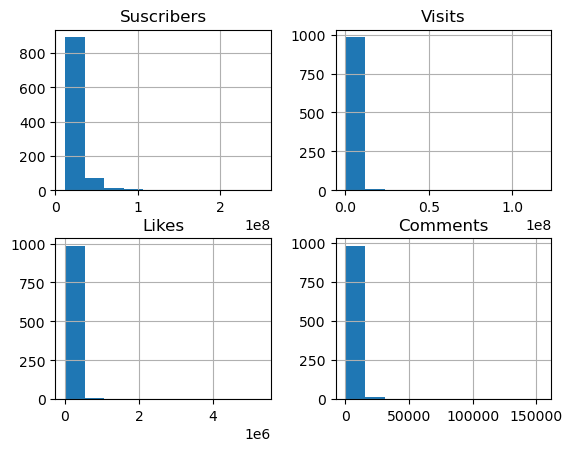

In [17]:
# checking the distribution of the numeric columns in the dataframe
fig=plt.figure(figsize=(12,8))
df.hist();

#### Observation: 

The histogram illustrates the distribution of numerical columns, revealing the presence of outliers. This is expected as the dataset encompasses diverse YouTube channels, each drawing varying levels of subscribers, likes, and comments. To gain a more in-depth understanding of these outliers, employing boxplots would be beneficial. Boxplots offer a concise representation, displaying the median, quartiles, and potential outliers in the dataset.

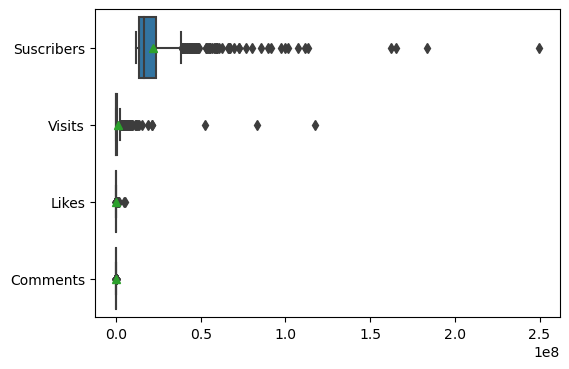

In [18]:
#checking for outliers
fig=plt.figure(figsize=(6,4))
sns.boxplot(df,
             showmeans = True,
             orient="h"
);

# Trend Analysis

    ● Is dentify trends among the top YouTube streamers. Which categories are the most popular?
    ● Is there a correlation between the number of subscribers and the number of likes or comments?

To identify the top YouTube streamers, we analyze the top 25% of the data, sorted based on the 'Visits' (views) column.

In [19]:
#Filter the data into top 25%
low, high = df['Visits'].quantile([0.75, 1])
df_filtered = df[df['Visits'].between(low, high)]

In [20]:
print(df_filtered.info())
df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249 entries, 1 to 990
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    249 non-null    object 
 1   Categories  249 non-null    object 
 2   Suscribers  249 non-null    float64
 3   Country     249 non-null    object 
 4   Visits      249 non-null    float64
 5   Likes       249 non-null    float64
 6   Comments    249 non-null    float64
 7   Links       249 non-null    object 
dtypes: float64(4), object(4)
memory usage: 17.5+ KB
None


,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,MrBeast,"Video Games, Humor",183500000.0,United States,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,CoComelon,Education,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
4,KidsDianaShow,"Animation, Toys",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
5,PewDiePie,"Movies, Video Games",111500000.0,United States,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
6,LikeNastyaofficial,Toys,107500000.0,Unknown,2600000.0,28000.0,0.0,http://youtube.com/channel/UCJplp5SjeGSdVdwsfb...


In [21]:
# Drop all rows that contain 'Unknown'.
df_filtered = df_filtered [df_filtered["Categories"] != 'Unknown']
df_filtered = df_filtered [df_filtered["Country"] != 'Unknown']
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 1 to 984
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Username    144 non-null    object 
 1   Categories  144 non-null    object 
 2   Suscribers  144 non-null    float64
 3   Country     144 non-null    object 
 4   Visits      144 non-null    float64
 5   Likes       144 non-null    float64
 6   Comments    144 non-null    float64
 7   Links       144 non-null    object 
dtypes: float64(4), object(4)
memory usage: 10.1+ KB


In [22]:
# Top 10 Youtubers
top_10=df_filtered.groupby(['Username']).sum().sort_values(by = ['Visits'], ascending = False)[:11]
top_10

,Suscribers,Visits,Likes,Comments
Username,,,,
MrBeast,183500000.0,117400000.0,5300000.0,18500.0
MrBeast2,31300000.0,83100000.0,5000000.0,11600.0
DaFuqBoom,29800000.0,52700000.0,1700000.0,82800.0
BeastPhilanthropy,16900000.0,21500000.0,952100.0,24000.0
dojacat,11900000.0,13600000.0,395300.0,73000.0
NickPro,13200000.0,12200000.0,286000.0,245.0
StokesTwins,22700000.0,11700000.0,235000.0,10000.0
triggeredinsaan,20400000.0,11100000.0,1400000.0,38000.0
A4a4a4a4,47300000.0,9700000.0,330400.0,22000.0


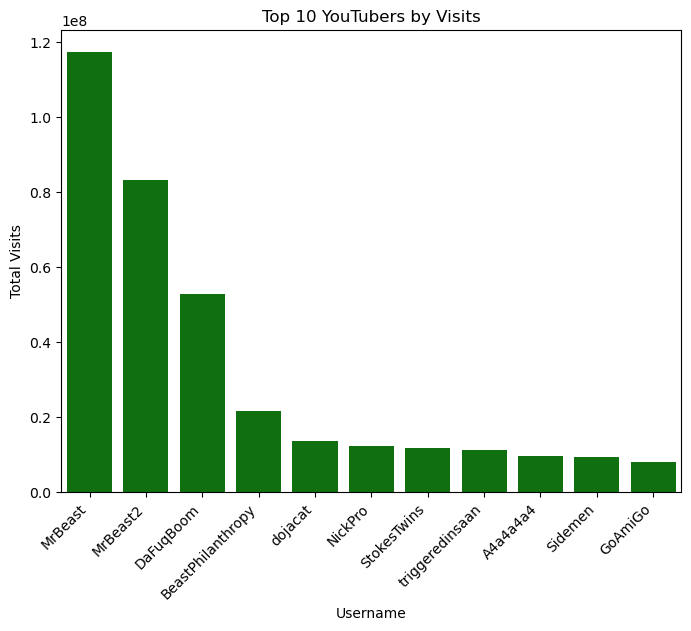

In [23]:
# Visualize the Top_10 Youtubers according to their number of visits
plt.figure(figsize=(8, 6))
sns.barplot(x=top_10.index, y='Visits', data=top_10, color="green")
plt.title('Top 10 YouTubers by Visits')
plt.xlabel('Username')
plt.ylabel('Total Visits')
plt.xticks(rotation=45, ha='right')  # Adjust rotation for better visibility
plt.show();

The barchart above depicts the top 10 YouTubers by number of visits.
1. MrBeast
2. DaFuqBoom
3. BeastPhilanthropy
4. dojacat
5. NickPro
6. StokesTwins
7. triggeredinsaan
8. A4a4a4a4
9. Sidemen
10. GoAm

In [24]:
top_cat=df_filtered.groupby(['Categories']).sum().sort_values(by = ['Visits'], ascending = False)
top_cat.head(15)

,Suscribers,Visits,Likes,Comments
Categories,,,,
"Video Games, Humor",459600000.0,173284800.0,7090900.0,81726.0
Daily Vlogs,266400000.0,120800000.0,6756700.0,33936.0
"Animation, Humor",335100000.0,99400000.0,3772100.0,139281.0
Music and Dance,445500000.0,44962500.0,1828200.0,139387.0
"Animation, Video Games",277400000.0,32800000.0,2388500.0,120400.0
Food and Drink,77600000.0,31100000.0,1499700.0,34603.0
"Movies, Humor",132200000.0,23865100.0,1129500.0,25322.0
Video Games,219600000.0,23600000.0,996000.0,27008.0
Humor,80200000.0,22300000.0,1674500.0,50737.0


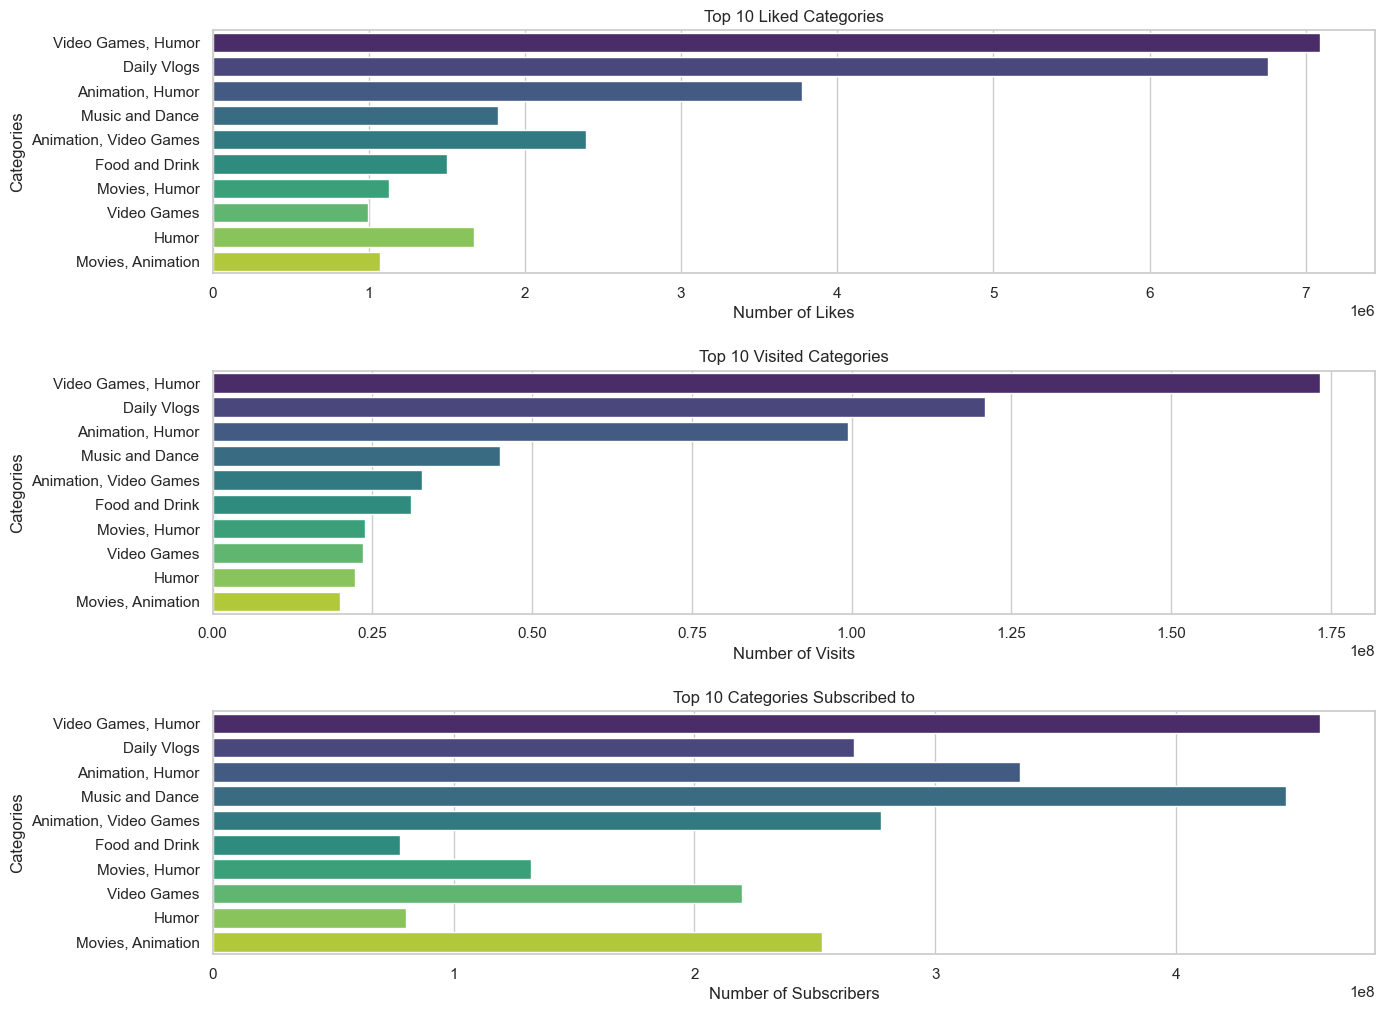

In [25]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axs = plt.subplots(figsize=(15, 12), nrows=3, ncols=1)
plt.subplots_adjust(hspace=0.4)

# Top 10 Liked Categories
sns.barplot(x='Likes', y=top_cat[:10].index, data=top_cat[:10],
            estimator=sum, ci=None, ax=axs[0], palette='viridis')
axs[0].set_title('Top 10 Liked Categories')
axs[0].set_xlabel('Number of Likes')

# Top 10 Visited Categories
sns.barplot(x='Visits', y=top_cat[:10].index, data=top_cat[:10],
            estimator=sum, ci=None, ax=axs[1], palette='viridis')
axs[1].set_title('Top 10 Visited Categories')
axs[1].set_xlabel('Number of Visits')

# Top 10 Categories Subscribed to
sns.barplot(x='Suscribers', y=top_cat[:10].index, data=top_cat[:10],
            estimator=sum, ci=None, ax=axs[2], palette='viridis')
axs[2].set_title('Top 10 Categories Subscribed to')
axs[2].set_xlabel('Number of Subscribers')

# Show the plot
plt.show()


The most popular categories are:
- Video games
- Daily Vlogs
- Animation (Humour)
- Music and Dance
- Animation (Video Games)
- Food and Drinks
- Movies (Humour)
- Movies (Animation)- 

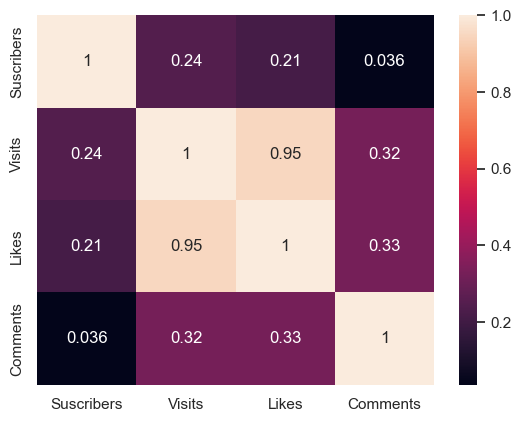

In [26]:
# Correlation to check for relationship between variable
corr = df.corr()
sns.heatmap(corr, annot=True);

**Observations:**
- There is no correlation between `Subscribers` and `Likes` but a strong correlation exist between `Visits` and `Likes`. Furthermore, there exist a weak linear relationship between `Visits` and `Comments` as well as `Likes` and `Comments`. However, there is no correlation between `Comments` and `Subscribers`

# Audience Study
- Analyze the distribution of streamers audiences by country. Are there regional preferences for
    specific content categories?

In [27]:
df_filtered.groupby(["Country",'Categories']).sum().sort_values(by = ['Visits'], ascending = False).head(25)

Suscribers       Visits      Likes  \
Country        Categories                                                    
United States  Video Games, Humor      422700000.0  158984800.0  6415400.0   
               Daily Vlogs              74400000.0   85800000.0  5106500.0   
               Animation, Humor        209800000.0   74500000.0  2545800.0   
               Food and Drink           62600000.0   29400000.0  1410000.0   
               Music and Dance         178500000.0   25400000.0  1011700.0   
               Animation, Video Games  198300000.0   23300000.0  1528700.0   
India          Daily Vlogs             124400000.0   20400000.0  1065100.0   
United States  Sports                   25800000.0   13600000.0   338300.0   
Russia         Video Games             115200000.0   11500000.0   605300.0   
United States  Movies                   45400000.0   11300000.0   414400.0   
India          Humor                    20400000.0   11100000.0  1400000.0   
Mexico         Animation, Humor         55100000.0   10900000.0   601500.0   
United States  Video Games              91400000.0   10500000.0   294400.0   
               Movies, Humor            52500000.0    9900000.0   520500.0   
               Science and Technology   67100000.0    9800000.0   695700.0   
Russia         Animation, Humor         47300000.0    9700000.0   330400.0   
United Kingdom Video Games, Humor       19500000.0    9200000.0   284800.0   
Colombia       Daily Vlogs              15400000.0    7900000.0   455300.0   
United States  Music and Dance, Humor   17400000.0    7900000.0    98500.0   
Mexico         Movies, Animation       153600000.0    7500000.0   508500.0   
India          Movies, Animation        12400000.0    7400000.0   343000.0   
               Education                21700000.0    7300000.0   501700.0   
               News and Politics        12900000.0    6400000.0   328000.0   
Argentina      Animation                25700000.0    5700000.0   208400.0   
               Movies, Humor            18800000.0    5600000.0   401700.0   

                                       Comments  
Country        Categories                        
United States  Video Games, Humor       62526.0  
               Daily Vlogs              16300.0  
               Animation, Humor         98154.0  
               Food and Drink           33700.0  
               Music and Dance         103400.0  
               Animation, Video Games   95600.0  
India          Daily Vlogs              14336.0  
United States  Sports                     567.0  
Russia         Video Games              19600.0  
United States  Movies                   20500.0  
India          Humor                    38000.0  
Mexico         Animation, Humor         17827.0  
United States  Video Games               7112.0  
               Movies, Humor             6622.0  
               Science and Technology   16700.0  
Russia         Animation, Humor         22000.0  
United Kingdom Video Games, Humor        8200.0  
Colombia       Daily Vlogs               2300.0  
United States  Music and Dance, Humor    8500.0  
Mexico         Movies, Animation         6595.0  
India          Movies, Animation        12000.0  
               Education                17000.0  
               News and Politics        10000.0  
Argentina      Animation                 1700.0  
               Movies, Humor             2700.0

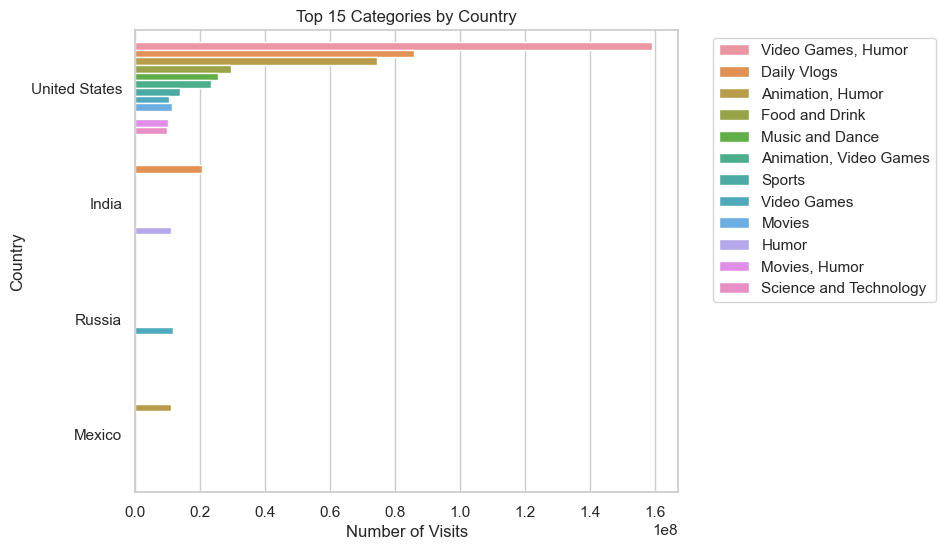

In [28]:
# Assuming df_grouped is the grouped and sorted DataFrame
df_grouped = df_filtered.groupby(["Country", 'Categories']).sum().sort_values(by=['Visits'], ascending=False)[:15].reset_index()

# Set up the matplotlib figure
plt.figure(figsize=(7, 6))
ax=sns.barplot(x='Visits', y='Country', hue='Categories', data=df_grouped)
plt.xlabel('Number of Visits')
plt.title('Top 15 Categories by Country')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


__Observations__:
 - In the dataset, the `Country` variable denotes the countries of the YouTubers.

 - For USA YouTubers, channels focusing on `video games and humor` accumulate the highest number of `visits`, followed by `daily vlogs`, `animations`, and `food & drinks` channels. Conversely, `science and technology` channels receive the least number of visits. Among Indian YouTubers, `daily vlog` channels and `humor` channels are the top two most visited categories. In Russia, `animation` and `humor` are the most visited categories on YouTube.

## Performance Metrics

- Calculate and visualize the average number of subscribers, visits, likes, and comments.
- Are there patterns or anomalies in these metrics?

In [29]:
avg=pd.DataFrame(df.mean(), columns=["Mean"])
avg.head()

,Mean
Suscribers,2.193038e+07
Visits,1.215601e+06
Likes,5.390243e+04
Comments,1.296157e+03


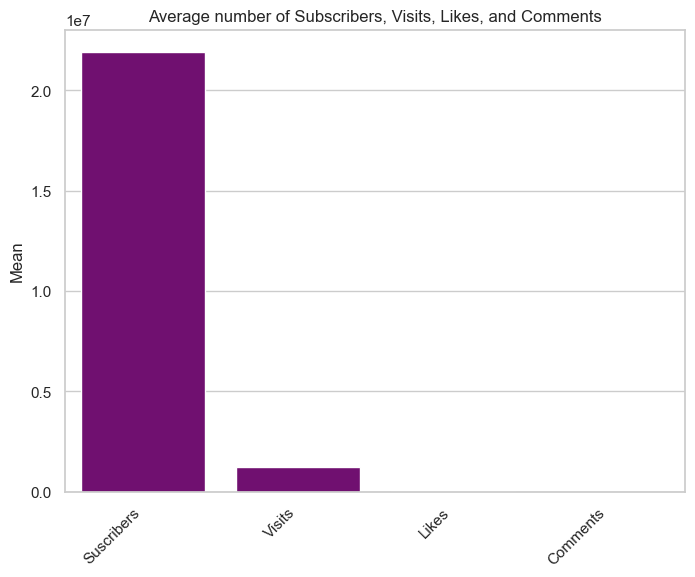

In [30]:
# Visualize the Average number of Subscribers, Visits, Likes, and Comments
plt.figure(figsize=(8, 6))
sns.barplot(x=avg.index, y='Mean', data=avg, color="purple")
plt.title('Average number of Subscribers, Visits, Likes, and Comments')
plt.ylabel('Mean')
plt.xticks(rotation=45, ha='right')  
plt.show();

- Indeed, anomalies are present when the number of `subscribers` surpasses the number of `likes` and `visitors`. Such deviations from typical engagement patterns may warrant further investigation to understand the underlying reasons for this unusual behavior. It could be influenced by various factors, including the authenticity of subscriber counts, the content's resonance with the audience, or potential manipulations in data reporting. Examining these anomalies in more detail can provide insights into the accuracy and reliability of the dataset.

## Content Categories

- Explore the distribution of content categories. Which categories have the highest number of
  streamers?
- Are there specific categories with exceptional performance metrics?

In [31]:
top_stream=df_filtered.groupby(['Categories']).sum().sort_values(by = ['Visits'], ascending = False)
top_stream.head(15)

,Suscribers,Visits,Likes,Comments
Categories,,,,
"Video Games, Humor",459600000.0,173284800.0,7090900.0,81726.0
Daily Vlogs,266400000.0,120800000.0,6756700.0,33936.0
"Animation, Humor",335100000.0,99400000.0,3772100.0,139281.0
Music and Dance,445500000.0,44962500.0,1828200.0,139387.0
"Animation, Video Games",277400000.0,32800000.0,2388500.0,120400.0
Food and Drink,77600000.0,31100000.0,1499700.0,34603.0
"Movies, Humor",132200000.0,23865100.0,1129500.0,25322.0
Video Games,219600000.0,23600000.0,996000.0,27008.0
Humor,80200000.0,22300000.0,1674500.0,50737.0


- The most effective way to identify the highest number of streamers is by utilizing the 'visit' metric. This is because there are subscribers who do not actively visit channels, and, in addition, other YouTube users may frequently visit channels without necessarily subscribing to them.
- Let's visualize the top categories with the number of `Visits`

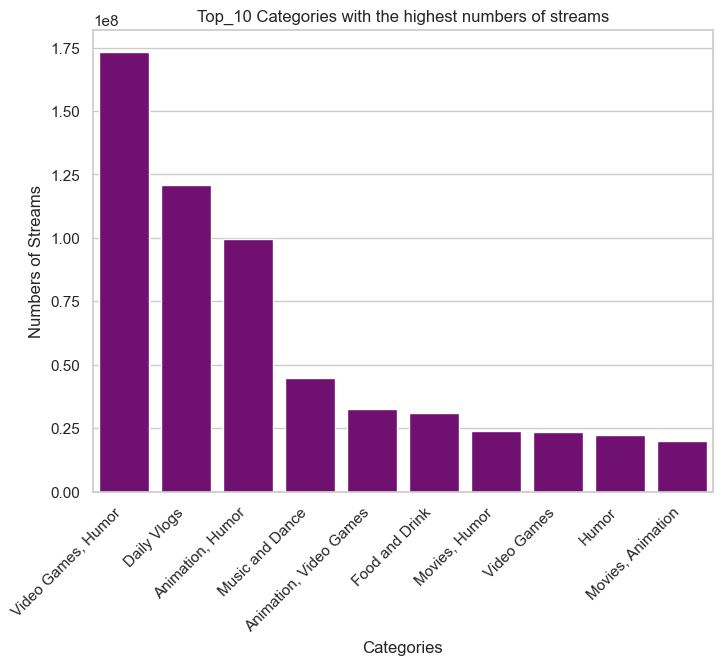

In [32]:
# Visualize the Top_10 Categories with the highest numbers of streams
plt.figure(figsize=(8, 6))
sns.barplot(x=top_stream[:10].index, y='Visits', data=top_stream[:10], color="purple")
plt.title('Top_10 Categories with the highest numbers of streams')
plt.xlabel('Categories')
plt.ylabel('Numbers of Streams')
plt.xticks(rotation=45, ha='right') 
plt.show();

- We can clearly see the Categories with the highest number of streams in descending order 

In [33]:
#  top 1% across all metrics
df2=df.copy()
df2 = df2[df2["Categories"] != 'Unknown']
df2 = df2[df2["Country"] != 'Unknown']
top_1_per =df2.quantile(0.99)

In [34]:
top_1_per

Suscribers    88114000.0
Visits        11930000.0
Likes           538914.0
Comments         22920.0
Name: 0.99, dtype: float64

In [35]:
# assign the top 1% of each columns to a new variable 
sus, vis, lik, com =np.round(top_1_per.values)

In [36]:
# subset the sum of each categories to a new
cat = df2.groupby('Categories').sum()

mask_sub = cat['Suscribers'] > sus
mask_vis = cat['Visits'] > vis
mask_lik= cat['Likes'] > lik
mask_com = cat['Comments'] > com

In [37]:
top_cat= cat[mask_sub & mask_vis & mask_lik & mask_com]
top_cat.sort_values(by= 'Visits', ascending=False)

,Suscribers,Visits,Likes,Comments
Categories,,,,
"Video Games, Humor",4.890000e+08,174074500.0,7148700.0,82060.0
Daily Vlogs,5.351000e+08,124394700.0,6916130.0,36252.0
"Animation, Humor",4.987000e+08,101344000.0,3932460.0,144040.0
Music and Dance,3.824400e+09,56657800.0,2751559.0,319495.0
"Animation, Video Games",6.594000e+08,40802000.0,2695997.0,128745.0
Food and Drink,1.772000e+08,32184800.0,1542077.0,36641.0
"Movies, Humor",5.091000e+08,29574300.0,1347527.0,34082.0
"Movies, Animation",1.159300e+09,29210200.0,1535496.0,39190.0
Video Games,4.747000e+08,26355600.0,1085300.0,33443.0


The Categories with exceptional performance are:

- Video Games
- Daily Vlogs
- Animation
- Music and Dance
- Food and Drink
- Movies
- Education

## Brands and Collaborations:
- Analyze whether streamers with high performance metrics receive more brand collaborations and
  marketing campaigns.

### Information on Branding and Collaborations was not provided in the dataset

## Benchmarking
- Identify streamers with above-average performance in terms of subscribers, visits, likes, and comments.
- Who are the top-performing content creators?

In [38]:
# Obtain the average value across all metrics
sub_avg, vis_avg, lik_avg, com_avg = np.round(df.mean().values)

In [39]:
mask_sub = df['Suscribers'] > sub_avg
mask_visits = df['Visits'] > vis_avg
mask_likes = df['Likes'] > lik_avg
mask_comments = df['Comments'] > com_avg

above_avg = df[mask_sub & mask_visits & mask_likes & mask_comments]


In [40]:
above_avg.head()

,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
1,MrBeast,"Video Games, Humor",183500000.0,United States,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
5,PewDiePie,"Movies, Video Games",111500000.0,United States,2400000.0,197300.0,4900.0,http://youtube.com/channel/UC-lHJZR3Gqxm24_Vd_...
26,dudeperfect,Video Games,59700000.0,United States,5300000.0,156500.0,4200.0,http://youtube.com/channel/UCRijo3ddMTht_IHyNS...
34,TaylorSwift,Music and Dance,54100000.0,United States,4300000.0,300400.0,15000.0,http://youtube.com/channel/UCqECaJ8Gagnn7YCbPE...
39,JuegaGerman,"Movies, Animation",48600000.0,Mexico,2000000.0,117100.0,3000.0,http://youtube.com/channel/UCYiGq8XF7YQD00x7wA...


In [41]:
above_avg.shape

(36, 8)

- Out of the 994 YouTubers analyzed in this dataset, only 36 exhibit performance metrics above the average across all metrics.

In [42]:
top_10=above_avg.groupby('Username').sum().sort_values(by = 'Likes', ascending = False)
top_10.head(15)

,Suscribers,Visits,Likes,Comments
Username,,,,
MrBeast,183500000.0,117400000.0,5300000.0,18500.0
MrBeast2,31300000.0,83100000.0,5000000.0,11600.0
DaFuqBoom,29800000.0,52700000.0,1700000.0,82800.0
MRINDIANHACKER,32600000.0,6500000.0,617400.0,26000.0
alanbecker,24300000.0,7600000.0,582600.0,5900.0
fedevigevani,32000000.0,7700000.0,412200.0,17000.0
souravjoshivlogs7028,22700000.0,5600000.0,382300.0,8900.0
AboFlah,32700000.0,3300000.0,382000.0,11400.0
TechnoGamerzOfficial,35600000.0,6200000.0,341800.0,16500.0


#### In all metrics, the following top 10 content creators stand out:

1. MrBeast
2. DaFuqBoom
3. MRINDIANHACKER
4. alanbecker
5. fedevigevani
6. souravjoshivlogs7028
7. AboFlah
8. TechnoGamerzOfficial
9. A4a4a4a4
10. VillageCookingChannel

## Content Recommendations:
- Propose a system for enhancing content recommendations to YouTube users based on streamers categories and performance metrics.

In [43]:
df3=df.copy().reset_index()

In [44]:
# Combine important columns. Recommendations will be given based on the similarity between country and categories
def combine_features(data):
    features = []
    for i in range(0, data.shape[0]):
        features.append(data["Categories"][i] + " " + data["Country"][i])
        print(features[i])
    return features

In [45]:
# Add merged columns to the dataframe
df3["combined_features"] = combine_features(df3)

Music and Dance India
Video Games, Humor United States
Education Unknown
Unknown India
Animation, Toys Unknown
Movies, Video Games United States
Toys Unknown
Animation, Toys Unknown
Music and Dance India
Video Games United States
Music and Dance United States
Unknown India
Movies, Animation India
Movies India
Music and Dance India
Music and Dance United States
Unknown India
Animation, Toys Unknown
Toys Unknown
Music and Dance Brazil
Unknown India
Music and Dance India
Music and Dance India
Music and Dance India
Movies, Animation United States
Music and Dance Unknown
Video Games United States
News and Politics India
Music and Dance Unknown
Music and Dance India
Music and Dance United States
Music and Dance India
Education Unknown
Music and Dance United States
Music and Dance United States
Music and Dance United States
Toys Unknown
Music and Dance United States
Unknown India
Movies, Animation Mexico
Music and Dance United States
Unknown Unknown
Music and Dance India
Animation, Humor Russ

In [46]:
# Convert text in the new column to a matrix of word counts
cm = CountVectorizer().fit_transform(df3["combined_features"])

# Get the cosine similarity matrix from the count matrix
cs = cosine_similarity(cm)


In [47]:
# recommend similar accounts
def recommend(df, account):
    recommendations = []
    # Find the index of the YouTuber the user likes
    ytuber_id = df[df.Username == account]["index"].values[0]

    # Create a list of tuples in the form (username, similarity score)
    scores = list(enumerate(cs[ytuber_id]))

    # Sort the list of similar books in descending order
    sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
    sorted_scores = sorted_scores[1:]

    # Exclude the account the user picked from the list of similar accounts
    for i in sorted_scores:
        if i[0] == ytuber_id:
            print(i)
            sorted_scores.remove(i)
    
    # Create a loop to print the first 5 most similar accounts
    print(f"The 5 most similar accounts to '{account}' are:\n ")
    
    j = 0
    for item in sorted_scores:
        accounts = df[df['index'] == item[0]]["Username"].values[0]
        recommendations.append(accounts)
        j = j+1
        if j >= 5:
            break

    return recommendations

In [48]:
# Recommend accounts that are similar to this user
df3.Username[1]

'MrBeast'

In [49]:
for count, account in enumerate(recommend(df3, df3.Username[1])):
    print(str(count+1) + '. ' + account)

The 5 most similar accounts to 'MrBeast' are:
 
1. brentrivera
2. PrestonYT
3. rug
4. StokesTwins
5. BenAzelart
